In [1]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

In [3]:
# loading and checking the data
df = pd.read_excel('Mortgage Insurance Cross Sell - Dataset.xls')
df.head(5)

,Ref,Credit_Score,Final_Grade,Term,Net_Advance,APR,Loan_Type,Mosaic,Mosaic_Class,Time_at_Address,...,CIFAS_detected,Time_since_most_recent_outstandi,Insurance_Description,PPI,code,prdt_desc,category,PPI_SINGLE,PPI_JOINT,PPI_LCI
0,1,918,A,36,3000.0,14.4,UnSecured,46,8,132,...,N,16,NaN,0,NaN,NaN,NaN,0,0,0
1,3,903,A,120,21000.0,7.9,secured,16,3,288,...,N,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,LCI,0,0,1
2,4,1060,X,78,7200.0,7.9,secured,17,3,276,...,N,50,Joint,1,719.0,LASCI JOINT,Joint,0,1,0
3,6,839,B,60,8000.0,16.9,UnSecured,47,8,48,...,N,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,LCI,0,0,1
4,7,1057,X,60,7650.0,7.4,UnSecured,55,10,156,...,N,99,Single,1,718.0,LASCI,Single,1,0,0


In [4]:
# Count of rows and columns
df.shape

(16383, 59)

In [5]:
# Checking count of null values across columns
df.isnull().sum()

Ref                                    0
Credit_Score                           0
Final_Grade                            0
Term                                   0
Net_Advance                            0
APR                                    0
Loan_Type                              0
Mosaic                                 0
Mosaic_Class                           0
Time_at_Address                        0
Residential_Status                     0
Telephone_Indicator                    0
Number_of_Dependants                   0
Marital_Status                         0
Gender                                 0
Time_in_Employment                     0
Employment_Status                      0
Full_Part_Time_Empl_Ind                0
Perm_Temp_Empl_Ind                     0
Income_Range                           0
Current_Account                        0
ACCESS_Card                            0
VISA_Card                              0
American_Express                       0
Diners_Card     

In [6]:
# Count of records who have PPI
print("Sum of Aggregate Class Imbalance: ",df['PPI'].sum())
print("Sum of PPI_SINGLE Class Imbalance: ",df['PPI_SINGLE'].sum())
print("Sum of PPI_JOINT Class Imbalance: ",df['PPI_JOINT'].sum())
print("Sum of PPI_LCI Class Imbalance: ",df['PPI_LCI'].sum())

Sum of Aggregate Class Imbalance:  9461
Sum of PPI_SINGLE Class Imbalance:  6264
Sum of PPI_JOINT Class Imbalance:  1225
Sum of PPI_LCI Class Imbalance:  1972


In [7]:
# Percentage of records who have PPI`
print("Percentage of Aggregate Class Imbalance: ",round((df['PPI'].sum()*100)/len(df.index),2))
print("Percentage of Aggregate Class Imbalance: ",round((df['PPI_SINGLE'].sum()*100)/len(df.index),2))
print("Percentage of Aggregate Class Imbalance: ",round((df['PPI_JOINT'].sum()*100)/len(df.index),2))
print("Percentage of Aggregate Class Imbalance: ",round((df['PPI_LCI'].sum()*100)/len(df.index),2))

Percentage of Aggregate Class Imbalance:  57.75
Percentage of Aggregate Class Imbalance:  38.23
Percentage of Aggregate Class Imbalance:  7.48
Percentage of Aggregate Class Imbalance:  12.04


In [8]:
# Checking if it's a Multi class or Multi label problem
df['Total'] = df['PPI_SINGLE'] + df['PPI_JOINT'] + df['PPI_LCI']
df[df['Total'] > 1]

,Ref,Credit_Score,Final_Grade,Term,Net_Advance,APR,Loan_Type,Mosaic,Mosaic_Class,Time_at_Address,...,Time_since_most_recent_outstandi,Insurance_Description,PPI,code,prdt_desc,category,PPI_SINGLE,PPI_JOINT,PPI_LCI,Total


Though inherently we know that all three type of labels are a category of insurance.  
Since none of the records have PPI of more than one type it's safe to assume that it's a multi class problem.  

In [9]:
# Creating another field for multi class algo
df['Total'] = df['PPI_SINGLE'] + df['PPI_JOINT'].replace(1,2) + df['PPI_LCI'].replace(1,3)
df[df['Total'] > 0]

,Ref,Credit_Score,Final_Grade,Term,Net_Advance,APR,Loan_Type,Mosaic,Mosaic_Class,Time_at_Address,...,Time_since_most_recent_outstandi,Insurance_Description,PPI,code,prdt_desc,category,PPI_SINGLE,PPI_JOINT,PPI_LCI,Total
1,3,903,A,120,21000.0,7.9,secured,16,3,288,...,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,LCI,0,0,1,3
2,4,1060,X,78,7200.0,7.9,secured,17,3,276,...,50,Joint,1,719.0,LASCI JOINT,Joint,0,1,0,2
3,6,839,B,60,8000.0,16.9,UnSecured,47,8,48,...,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,LCI,0,0,1,3
4,7,1057,X,60,7650.0,7.4,UnSecured,55,10,156,...,99,Single,1,718.0,LASCI,Single,1,0,0,1
5,8,913,A,120,33000.0,9.4,secured,59,11,18,...,99,Single,1,715.0,LASU,Single,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16364,42021,815,C,30,2000.0,31.9,UnSecured,23,4,324,...,99,LASU,1,758.0,LASU,Single,1,0,0,1
16368,42035,963,X,60,5000.0,9.9,UnSecured,47,8,4,...,99,LASU,1,758.0,LASU,Single,1,0,0,1
16369,42036,1010,X,60,5000.0,9.9,UnSecured,45,8,264,...,99,LASU,1,758.0,LASU,Single,1,0,0,1
16380,42069,831,C,60,1000.0,25.9,UnSecured,12,2,47,...,99,LASU,1,758.0,LASU,Single,1,0,0,1


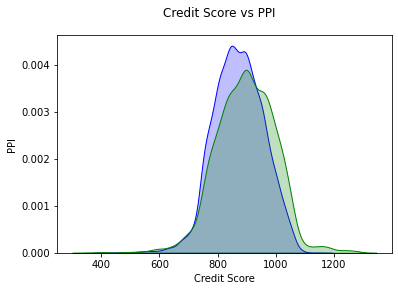

In [10]:
fig, ax = plt.subplots()
sns.kdeplot(df[df['PPI']==1]['Credit_Score'], shade=True, color="blue", label="Insured", ax=ax)
sns.kdeplot(df[df['PPI']==0]['Credit_Score'], shade=True, color="green", label="Not Insured", ax=ax)
ax.set_xlabel("Credit Score")
ax.set_ylabel("PPI")
fig.suptitle("Credit Score vs PPI");

People with lower credit score - higher sales of insurance  
People with higher credit score - lower sales of insurance

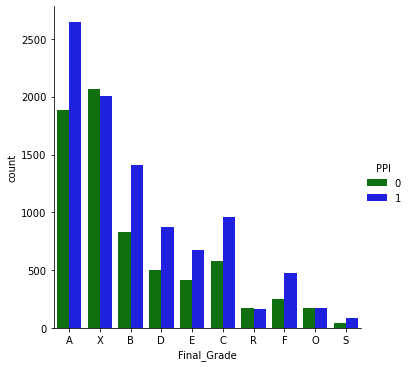

In [11]:
fig, ax = plt.subplots()
sns.catplot("Final_Grade", hue="PPI", data=df, kind="count", palette={1:"blue",0:"green"}, ax=ax)
plt.close(1)
ax.set_xlabel("Final Grade")
fig.suptitle("Final Grade vs PPI");

Insurance sales is better at Classes A, B, D, E, C, F and S as count of people with insurance is more than count of people without insurance

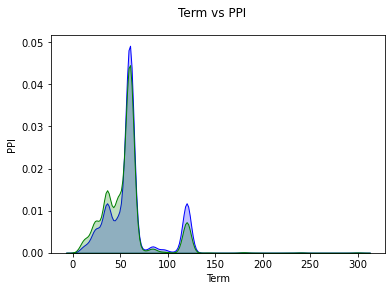

In [12]:
fig, ax = plt.subplots()
sns.kdeplot(df[df['PPI']==1]['Term'], shade=True, color="blue", label="Insured", ax=ax)
sns.kdeplot(df[df['PPI']==0]['Term'], shade=True, color="green", label="Not Insured", ax=ax)
ax.set_xlabel("Term")
ax.set_ylabel("PPI")
fig.suptitle("Term vs PPI");

People with lower loan term - lower sales of insurance  
People with higher loan term - higher sales of insurance

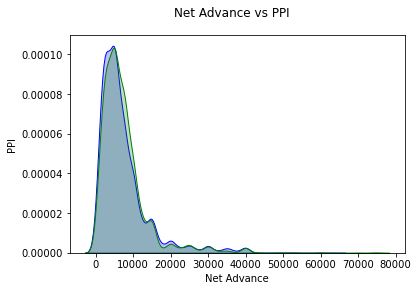

In [13]:
fig, ax = plt.subplots()
sns.kdeplot(df[df['PPI']==1]['Net_Advance'], shade=True, color="blue", label="Insured", ax=ax)
sns.kdeplot(df[df['PPI']==0]['Net_Advance'], shade=True, color="green", label="Not Insured", ax=ax)
ax.set_xlabel("Net Advance")
ax.set_ylabel("PPI")
fig.suptitle("Net Advance vs PPI");

Insurance sales are better at 4000-5000, 16000-24000 and 34000-38000 net advance brackets. However sales are average and no clear significance can be seen from the plot

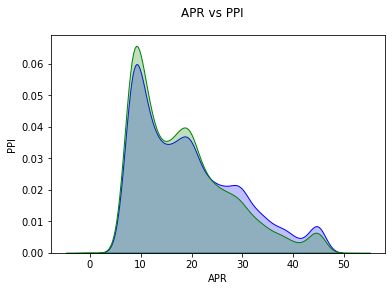

In [14]:
fig, ax = plt.subplots()
sns.kdeplot(df[df['PPI']==1]['APR'], shade=True, color="blue", label="Insured", ax=ax)
sns.kdeplot(df[df['PPI']==0]['APR'], shade=True, color="green", label="Not Insured", ax=ax)
ax.set_xlabel("APR")
ax.set_ylabel("PPI")
fig.suptitle("APR vs PPI");

Insurance sales increase post 25 APR. Hence higher the APR the better are the chances of insurance sale

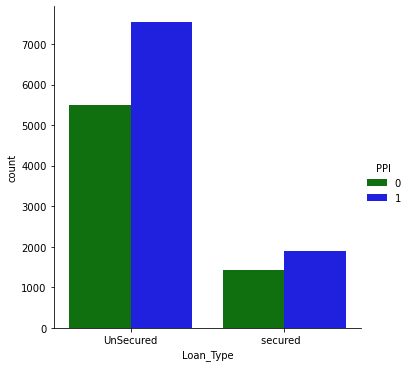

In [15]:
fig, ax = plt.subplots()
sns.catplot("Loan_Type", hue="PPI", data=df, kind="count", palette={1:"blue",0:"green"}, ax=ax)
plt.close(1)
ax.set_xlabel("Loan Type")
fig.suptitle("Loan Type vs PPI");

Unsecured Loans are doing better in sales of insurance  
However there's around 5500 potential buyers  
Also loan type should be mapped to binary value and Unsecured loan type should be 1 as it has higher conversions

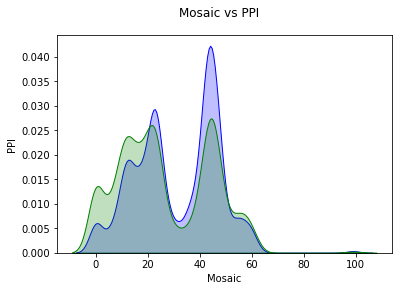

In [16]:
fig, ax = plt.subplots()
sns.kdeplot(df[df['PPI']==1]['Mosaic'], shade=True, color="blue", label="Insured", ax=ax)
sns.kdeplot(df[df['PPI']==0]['Mosaic'], shade=True, color="green", label="Not Insured", ax=ax)
ax.set_xlabel("Mosaic")
ax.set_ylabel("PPI")
fig.suptitle("Mosaic vs PPI");

Mosaic with values post 20 is better at sales of insurance and peaks between 35-55

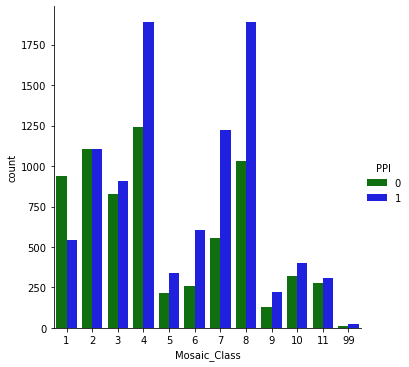

In [17]:
fig, ax = plt.subplots()
sns.catplot("Mosaic_Class", hue="PPI", data=df, kind="count", palette={1:"blue",0:"green"}, ax=ax)
plt.close(1)
ax.set_xlabel("Mosaic Class")
fig.suptitle("Mosaic Class vs PPI");

Mosaic Class 4 and 8 are doing significantly better at insurance sales  
Mosaic Class 1 and 2 are the bottom position at insurance sales as their potential customers is more than acquired customers

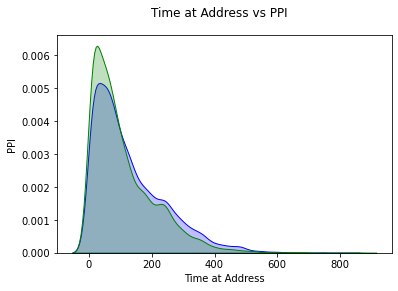

In [18]:
fig, ax = plt.subplots()
sns.kdeplot(df[df['PPI']==1]['Time_at_Address'], shade=True, color="blue", label="Insured", ax=ax)
sns.kdeplot(df[df['PPI']==0]['Time_at_Address'], shade=True, color="green", label="Not Insured", ax=ax)
ax.set_xlabel("Time at Address")
ax.set_ylabel("PPI")
fig.suptitle("Time at Address vs PPI");

Lower Time_at_Address results in lower sales  
Higher Time_at_Address specifically more than 120 has better sales

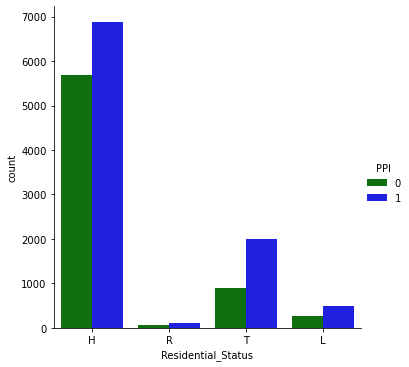

In [19]:
fig, ax = plt.subplots()
sns.catplot("Residential_Status", hue="PPI", data=df, kind="count", palette={1:"blue",0:"green"}, ax=ax)
plt.close(1)
ax.set_xlabel("Residential Status")
fig.suptitle("Residential Status vs PPI");

People with H residential status are spending more on insurance and at the same time there's 5500+ untapped customer base

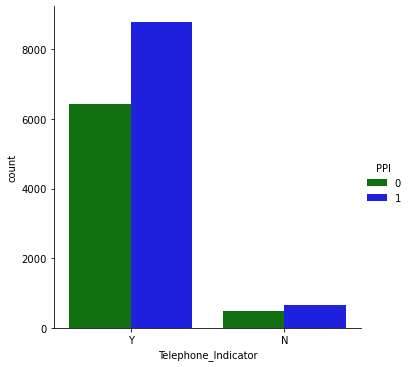

In [20]:
fig, ax = plt.subplots()
sns.catplot("Telephone_Indicator", hue="PPI", data=df, kind="count", palette={1:"blue",0:"green"}, ax=ax)
plt.close(1)
ax.set_xlabel("Telephone Indicator")
fig.suptitle("Telephone Indicator vs PPI");

People using telephone have higher number of insurance purchases and a potential customer base of 6000+

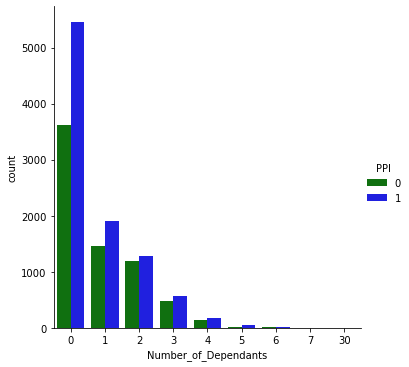

In [21]:
fig, ax = plt.subplots()
sns.catplot("Number_of_Dependants", hue="PPI", data=df, kind="count", palette={1:"blue",0:"green"}, ax=ax)
plt.close(1)
ax.set_xlabel("Number of Dependants")
fig.suptitle("Number of Dependants vs PPI");

As the number of dependant increases the sales of insurance decreases. Also the gap decreases between the customers who bought insurance and who didn't. Hence it would be fruitful to target customers with no dependants.

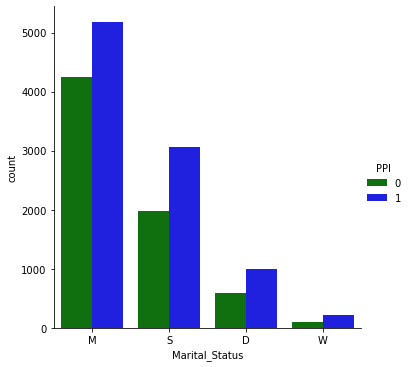

In [22]:
fig, ax = plt.subplots()
sns.catplot("Marital_Status", hue="PPI", data=df, kind="count", palette={1:"blue",0:"green"}, ax=ax)
plt.close(1)
ax.set_xlabel("Marital Status")
fig.suptitle("Marital Status vs PPI");

Singles and Married tend to buy significant number of more insurance than Divorced or Widowed. Hence these two group of customer should be given more weight.

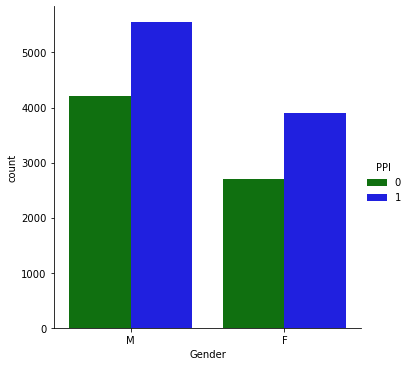

In [23]:
fig, ax = plt.subplots()
sns.catplot("Gender", hue="PPI", data=df, kind="count", palette={1:"blue",0:"green"}, ax=ax)
plt.close(1)
ax.set_xlabel("Gender")
fig.suptitle("Gender vs PPI");

Males have a slightly higher tendency to buy insurance but it's negligible

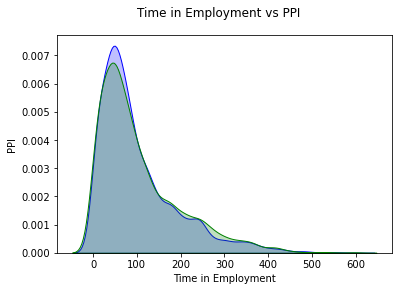

In [24]:
fig, ax = plt.subplots()
sns.kdeplot(df[df['PPI']==1]['Time_in_Employment'], shade=True, color="blue", label="Insured", ax=ax)
sns.kdeplot(df[df['PPI']==0]['Time_in_Employment'], shade=True, color="green", label="Not Insured", ax=ax)
ax.set_xlabel("Time in Employment")
ax.set_ylabel("PPI")
fig.suptitle("Time in Employment vs PPI");

People invest in insurance at a early stage of their career which peaks between 24 to 100 months and dies down post 150 months of employement

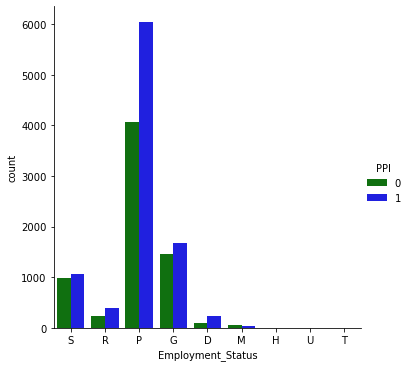

In [25]:
fig, ax = plt.subplots()
sns.catplot("Employment_Status", hue="PPI", data=df, kind="count", palette={1:"blue",0:"green"}, ax=ax)
plt.close(1)
ax.set_xlabel("Employment Status")
fig.suptitle("Employment Status vs PPI");

Insurance sales are at best with P employment status

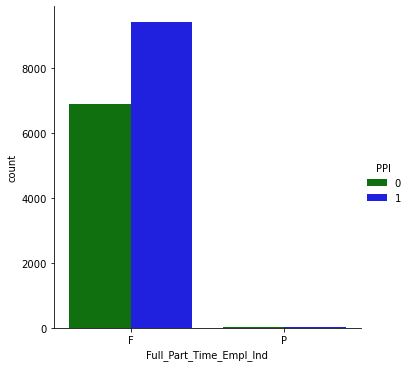

In [26]:
fig, ax = plt.subplots()
sns.catplot("Full_Part_Time_Empl_Ind", hue="PPI", data=df, kind="count", palette={1:"blue",0:"green"}, ax=ax)
plt.close(1)
ax.set_xlabel("Full_Part_Time_Empl_Ind")
fig.suptitle("Full_Part_Time_Empl_Ind vs PPI");

People with full time jobs are investing significantly in insurance and also has a large customer base to be acquired

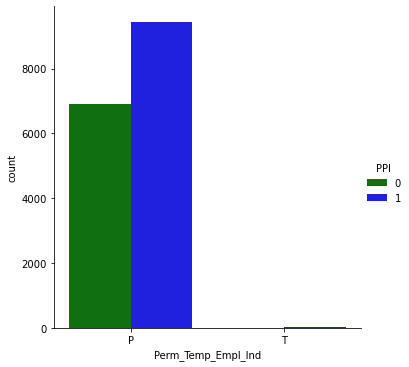

In [27]:
fig, ax = plt.subplots()
sns.catplot("Perm_Temp_Empl_Ind", hue="PPI", data=df, kind="count", palette={1:"blue",0:"green"}, ax=ax)
plt.close(1)
ax.set_xlabel("Perm_Temp_Empl_Ind")
fig.suptitle("Perm_Temp_Empl_Ind vs PPI");

Permanent employees are also significantly investing in insurance than temp employees  
Also, the plot seems similar to the above plot of Full_Part_Time_Empl_Ind and needs to be verified if people who have not purchased insurance are in full time temp jobs

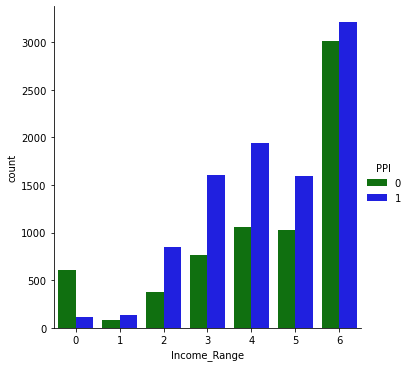

In [28]:
fig, ax = plt.subplots()
sns.catplot("Income_Range", hue="PPI", data=df, kind="count", palette={1:"blue",0:"green"}, ax=ax)
plt.close(1)
ax.set_xlabel("Income_Range")
fig.suptitle("Income_Range vs PPI");

People with income range between 2-5 are investing in insurance more than people with 0, 1 or 6 lpa income range

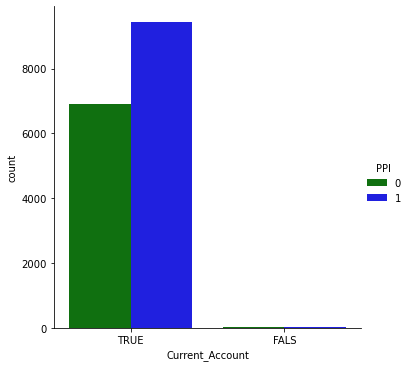

In [29]:
fig, ax = plt.subplots()
sns.catplot("Current_Account", hue="PPI", data=df, kind="count", palette={1:"blue",0:"green"}, ax=ax)
plt.close(1)
ax.set_xlabel("Current_Account")
fig.suptitle("Current_Account vs PPI");

People with current account have bought insurance significantly more than the ones without current account

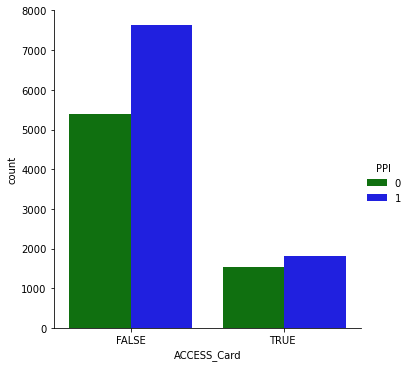

In [30]:
fig, ax = plt.subplots()
sns.catplot("ACCESS_Card", hue="PPI", data=df, kind="count", palette={1:"blue",0:"green"}, ax=ax)
plt.close(1)
ax.set_xlabel("ACCESS_Card")
fig.suptitle("ACCESS_Card vs PPI");

People without Access card are buying insurance more than those who possess Access card

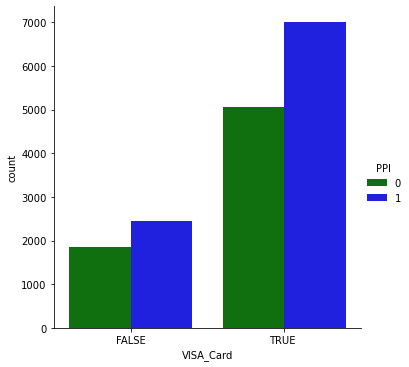

In [31]:
fig, ax = plt.subplots()
sns.catplot("VISA_Card", hue="PPI", data=df, kind="count", palette={1:"blue",0:"green"}, ax=ax)
plt.close(1)
ax.set_xlabel("VISA_Card")
fig.suptitle("VISA_Card vs PPI");

Insurance is very popular with people who have Visa card

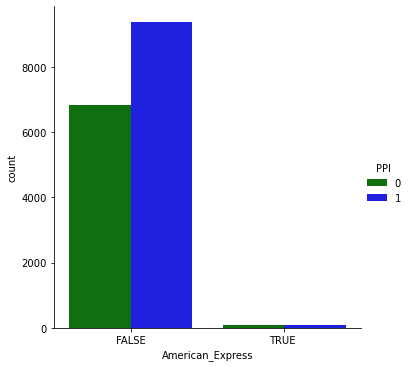

In [32]:
fig, ax = plt.subplots()
sns.catplot("American_Express", hue="PPI", data=df, kind="count", palette={1:"blue",0:"green"}, ax=ax)
plt.close(1)
ax.set_xlabel("American_Express")
fig.suptitle("American_Express vs PPI");

People who don't have American express are investing in insurance

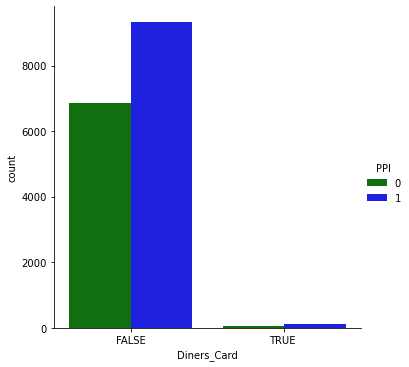

In [33]:
fig, ax = plt.subplots()
sns.catplot("Diners_Card", hue="PPI", data=df, kind="count", palette={1:"blue",0:"green"}, ax=ax)
plt.close(1)
ax.set_xlabel("Diners_Card")
fig.suptitle("Diners_Card vs PPI");

People who don't have Diners card are also investing in insurance

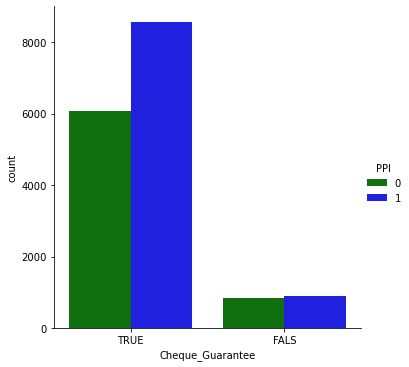

In [34]:
fig, ax = plt.subplots()
sns.catplot("Cheque_Guarantee", hue="PPI", data=df, kind="count", palette={1:"blue",0:"green"}, ax=ax)
plt.close(1)
ax.set_xlabel("Cheque_Guarantee")
fig.suptitle("Cheque_Guarantee vs PPI");

People who have got cheque guarantee have invested in insurance

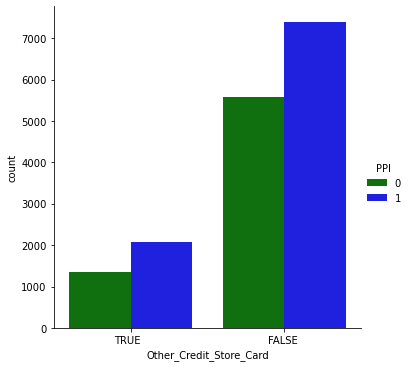

In [35]:
fig, ax = plt.subplots()
sns.catplot("Other_Credit_Store_Card", hue="PPI", data=df, kind="count", palette={1:"blue",0:"green"}, ax=ax)
plt.close(1)
ax.set_xlabel("Other_Credit_Store_Card")
fig.suptitle("Other_Credit_Store_Card vs PPI");

People who don't posses other store credit card are investing in insurance

People who don't have cards from access, american express, diners and other credit stores are investing in insurance  
Also people with Visa card, cheque guarantee and current account have bought insurance significantly than those who don't have these

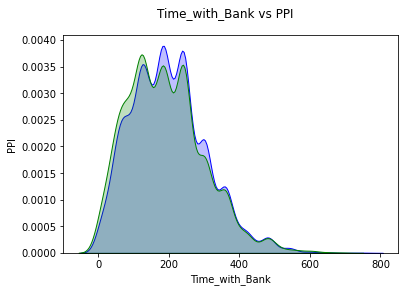

In [36]:
fig, ax = plt.subplots()
sns.kdeplot(df[df['PPI']==1]['Time_with_Bank'], shade=True, color="blue", label="Insured", ax=ax)
sns.kdeplot(df[df['PPI']==0]['Time_with_Bank'], shade=True, color="green", label="Not Insured", ax=ax)
ax.set_xlabel("Time_with_Bank")
ax.set_ylabel("PPI")
fig.suptitle("Time_with_Bank vs PPI");

Accounts with tenurity higher than 190 months are more inclined to invest in insurance

In [37]:
eda_df = df[['Value_of_Property','Outstanding_Mortgage_Bal','Total_Outstanding_Balances']]
norm_df = (eda_df-eda_df.mean())/eda_df.std()
norm_df['PPI'] = df['PPI']
norm_df.head()

,Value_of_Property,Outstanding_Mortgage_Bal,Total_Outstanding_Balances,PPI
0,0.097992,-0.269572,-0.154414,0
1,0.114838,-0.704559,-0.521119,1
2,0.274877,-0.632294,-0.583395,1
3,-0.390549,-0.843826,1.151853,1
4,0.114838,-0.119960,-0.161068,1


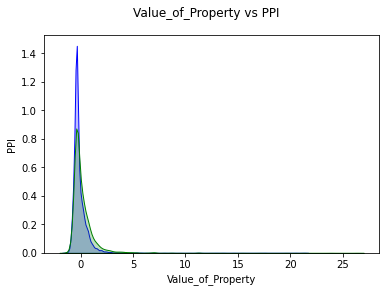

In [38]:
fig, ax = plt.subplots()
sns.kdeplot(norm_df[norm_df['PPI']==1]['Value_of_Property'], shade=True, color="blue", label="Insured", ax=ax)
sns.kdeplot(norm_df[norm_df['PPI']==0]['Value_of_Property'], shade=True, color="green", label="Not Insured", ax=ax)
ax.set_xlabel("Value_of_Property")
ax.set_ylabel("PPI")
fig.suptitle("Value_of_Property vs PPI");

People with median property values are more inclined towards insurance and higher value property owners insurance rate is below 50%

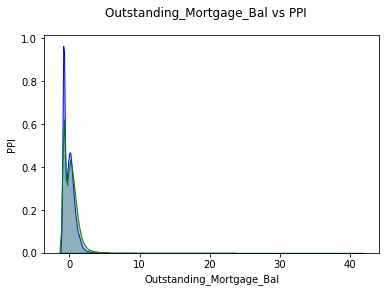

In [39]:
fig, ax = plt.subplots()
sns.kdeplot(norm_df[norm_df['PPI']==1]['Outstanding_Mortgage_Bal'], shade=True, color="blue", label="Insured", ax=ax)
sns.kdeplot(norm_df[norm_df['PPI']==0]['Outstanding_Mortgage_Bal'], shade=True, color="green", label="Not Insured", ax=ax)
ax.set_xlabel("Outstanding_Mortgage_Bal")
ax.set_ylabel("PPI")
fig.suptitle("Outstanding_Mortgage_Bal vs PPI");

Home owners with least outstanding loan are more inclined towards insurance which decreases as the outstanding increases

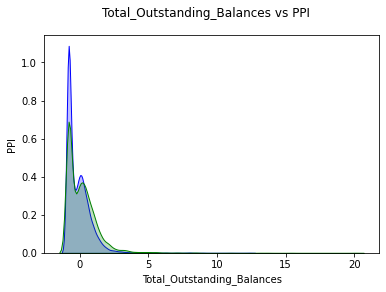

In [40]:
fig, ax = plt.subplots()
sns.kdeplot(norm_df[norm_df['PPI']==1]['Total_Outstanding_Balances'], shade=True, color="blue", label="Insured", ax=ax)
sns.kdeplot(norm_df[norm_df['PPI']==0]['Total_Outstanding_Balances'], shade=True, color="green", label="Not Insured", ax=ax)
ax.set_xlabel("Total_Outstanding_Balances")
ax.set_ylabel("PPI")
fig.suptitle("Total_Outstanding_Balances vs PPI");

People with lowest total outstanding balance have invested in insurance and peak also lies here

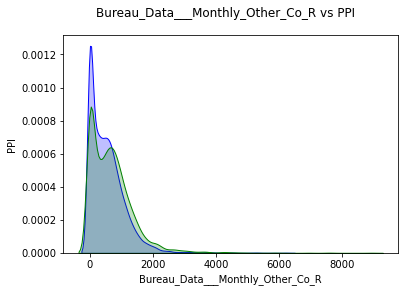

In [41]:
fig, ax = plt.subplots()
sns.kdeplot(df[df['PPI']==1]['Bureau_Data___Monthly_Other_Co_R'], shade=True, color="blue", label="Insured", ax=ax)
sns.kdeplot(df[df['PPI']==0]['Bureau_Data___Monthly_Other_Co_R'], shade=True, color="green", label="Not Insured", ax=ax)
ax.set_xlabel("Bureau_Data___Monthly_Other_Co_R")
ax.set_ylabel("PPI")
fig.suptitle("Bureau_Data___Monthly_Other_Co_R vs PPI");

People with the lowest bureau data are also spending the most on insurance

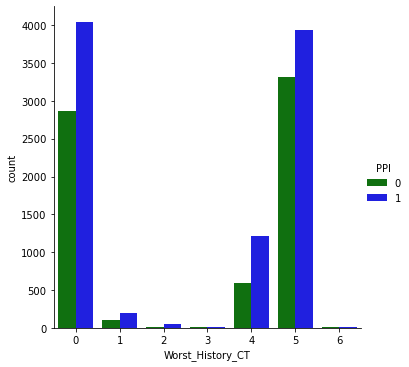

In [42]:
fig, ax = plt.subplots()
sns.catplot("Worst_History_CT", hue="PPI", data=df, kind="count", palette={1:"blue",0:"green"}, ax=ax)
plt.close(1)
ax.set_xlabel("Worst_History_CT")
fig.suptitle("Worst_History_CT vs PPI");

Insurance is popular with 0 and 5 worst_history_CT

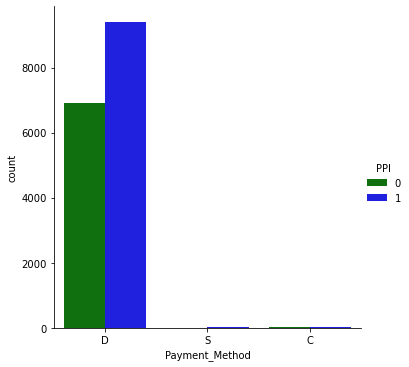

In [43]:
fig, ax = plt.subplots()
sns.catplot("Payment_Method", hue="PPI", data=df, kind="count", palette={1:"blue",0:"green"}, ax=ax)
plt.close(1)
ax.set_xlabel("Payment_Method")
fig.suptitle("Payment_Method vs PPI");

D payment method is very common for insurance purchases. We should focus on utilising this payment method as it has most number of customers who haven't purchased insurance yet

In [44]:
# checking if any value is below 0
df[df['Age']<0]['Age'].value_counts()

-21    1
-18    1
-20    1
Name: Age, dtype: int64

In [45]:
# changing negative to positive as age cannot be a negative value
df['Age'] = df['Age'].replace({-21:21,-18:18,-20:20})

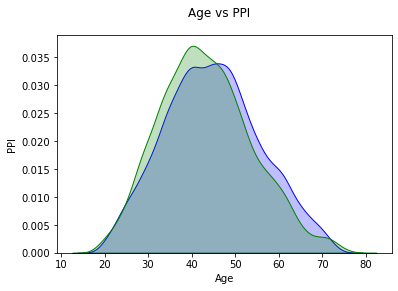

In [46]:
fig, ax = plt.subplots()
sns.kdeplot(df[df['PPI']==1]['Age'], shade=True, color="blue", label="Insured", ax=ax)
sns.kdeplot(df[df['PPI']==0]['Age'], shade=True, color="green", label="Not Insured", ax=ax)
ax.set_xlabel("Age")
ax.set_ylabel("PPI")
fig.suptitle("Age vs PPI");

Senior people beyond 45 years of age are more interested in buying insurance  
There's also a possibility to increase the customer base by spreading awareness among the younger generation of age 25-45

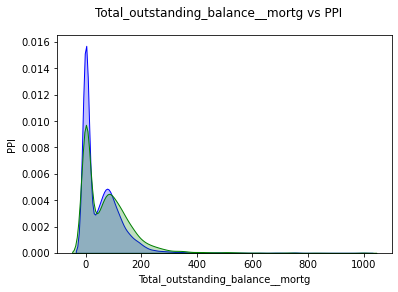

In [47]:
fig, ax = plt.subplots()
sns.kdeplot(df[df['PPI']==1]['Total_outstanding_balance__mortg'], shade=True, color="blue", label="Insured", ax=ax)
sns.kdeplot(df[df['PPI']==0]['Total_outstanding_balance__mortg'], shade=True, color="green", label="Not Insured", ax=ax)
ax.set_xlabel("Total_outstanding_balance__mortg")
ax.set_ylabel("PPI")
fig.suptitle("Total_outstanding_balance__mortg vs PPI");

People with lowest outstanding have invested more on insurance

In [48]:
# checking unique values of Total___Public_Info___CCJ____ban
df.Total___Public_Info___CCJ____ban.value_counts()

 0    14180
 1     1462
 2      458
 3      162
 4       77
 5       23
-1        8
 6        6
 7        5
 9        2
Name: Total___Public_Info___CCJ____ban, dtype: int64

In [49]:
# mapping -1 to 1
df['Total___Public_Info___CCJ____ban'] = df['Total___Public_Info___CCJ____ban'].replace(-1,1)

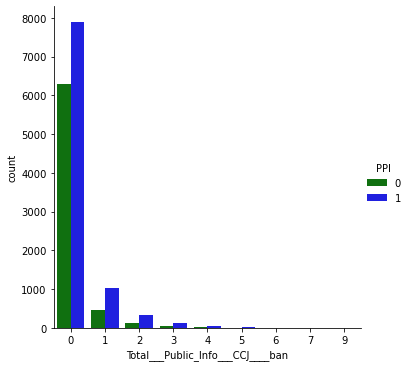

In [50]:
fig, ax = plt.subplots()
sns.catplot("Total___Public_Info___CCJ____ban", hue="PPI", data=df, kind="count", palette={1:"blue",0:"green"}, ax=ax)
plt.close(1)
ax.set_xlabel("Total___Public_Info___CCJ____ban")
fig.suptitle("Total___Public_Info___CCJ____ban vs PPI");

We should focus on 0 category as it has a very significant count of customers wo have purchased insurance

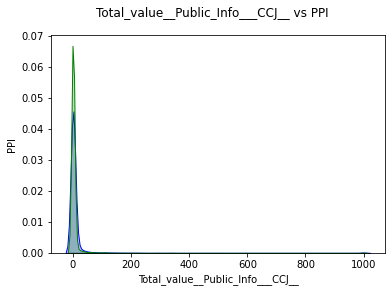

In [51]:
fig, ax = plt.subplots()
sns.kdeplot(df[df['PPI']==1]['Total_value__Public_Info___CCJ__'], shade=True, color="blue", label="Insured", ax=ax)
sns.kdeplot(df[df['PPI']==0]['Total_value__Public_Info___CCJ__'], shade=True, color="green", label="Not Insured", ax=ax)
ax.set_xlabel("Total_value__Public_Info___CCJ__")
ax.set_ylabel("PPI")
fig.suptitle("Total_value__Public_Info___CCJ__ vs PPI");

People with 0 value of public info have purchased insurance at a very lower count

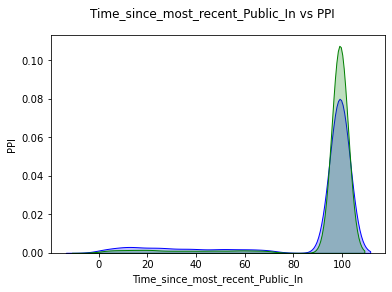

In [52]:
fig, ax = plt.subplots()
sns.kdeplot(df[df['PPI']==1]['Time_since_most_recent_Public_In'], shade=True, color="blue", label="Insured", ax=ax)
sns.kdeplot(df[df['PPI']==0]['Time_since_most_recent_Public_In'], shade=True, color="green", label="Not Insured", ax=ax)
ax.set_xlabel("Time_since_most_recent_Public_In")
ax.set_ylabel("PPI")
fig.suptitle("Time_since_most_recent_Public_In vs PPI");

People with higher time_since_most_recent_public_in are not buying insurance compared to people with lower values

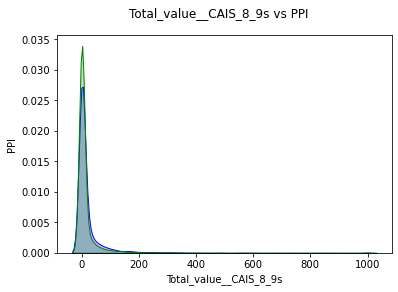

In [53]:
fig, ax = plt.subplots()
sns.kdeplot(df[df['PPI']==1]['Total_value__CAIS_8_9s'], shade=True, color="blue", label="Insured", ax=ax)
sns.kdeplot(df[df['PPI']==0]['Total_value__CAIS_8_9s'], shade=True, color="green", label="Not Insured", ax=ax)
ax.set_xlabel("Total_value__CAIS_8_9s")
ax.set_ylabel("PPI")
fig.suptitle("Total_value__CAIS_8_9s vs PPI");

People with 0 total_value have purchased insurance at a very lower count

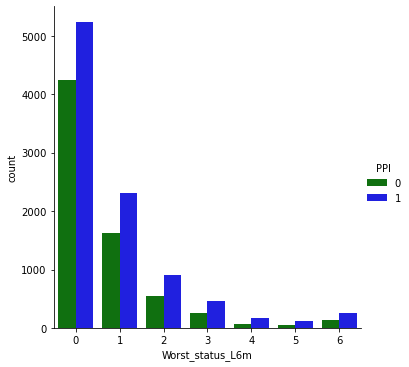

In [54]:
fig, ax = plt.subplots()
sns.catplot("Worst_status_L6m", hue="PPI", data=df, kind="count", palette={1:"blue",0:"green"}, ax=ax)
plt.close(1)
ax.set_xlabel("Worst_status_L6m")
fig.suptitle("Worst_status_L6m vs PPI");

People with 0 worst status have bought insurance significantly more then others. However there's also about 4000+ people who haven't in the same group.

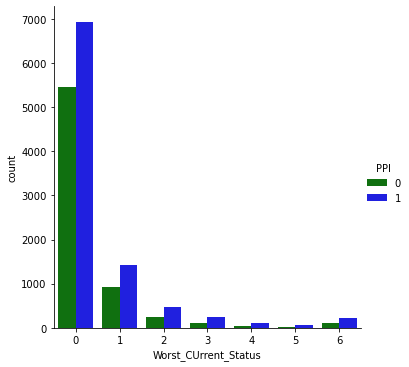

In [55]:
fig, ax = plt.subplots()
sns.catplot("Worst_CUrrent_Status", hue="PPI", data=df, kind="count", palette={1:"blue",0:"green"}, ax=ax)
plt.close(1)
ax.set_xlabel("Worst_CUrrent_Status")
fig.suptitle("Worst_CUrrent_Status vs PPI");

People with 0 worst current status have bought insurance significantly more then others. However there's also about 5000+ people who haven't in the same group.

In [56]:
# checking the unique value of __of_status_3_s_L6m
df.__of_status_3_s_L6m.value_counts()

 0    14767
 1      530
 2      281
 6      214
 3      181
 4      141
 9      110
 5       95
 7       39
 8       17
-1        8
Name: __of_status_3_s_L6m, dtype: int64

In [57]:
# mapping -1 to 1
df['__of_status_3_s_L6m'] = df['__of_status_3_s_L6m'].replace(-1,1)

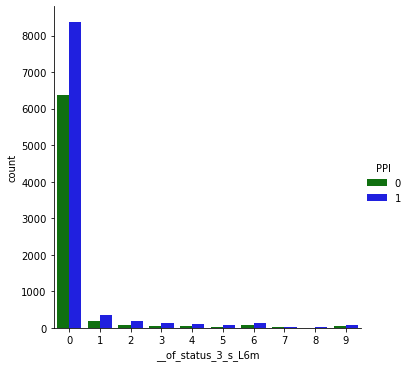

In [58]:
fig, ax = plt.subplots()
sns.catplot("__of_status_3_s_L6m", hue="PPI", data=df, kind="count", palette={1:"blue",0:"green"}, ax=ax)
plt.close(1)
ax.set_xlabel("__of_status_3_s_L6m")
fig.suptitle("__of_status_3_s_L6m vs PPI");

People with 0 status have bought insurance significantly more then others  
However there's also about 6400+ people who haven't in the same group

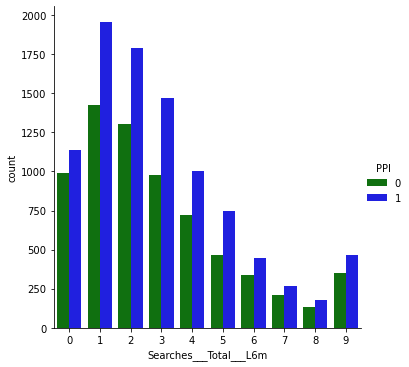

In [59]:
fig, ax = plt.subplots()
sns.catplot("Searches___Total___L6m", hue="PPI", data=df, kind="count", palette={1:"blue",0:"green"}, ax=ax)
plt.close(1)
ax.set_xlabel("Searches___Total___L6m")
fig.suptitle("Searches___Total___L6m vs PPI");

With an increasing search, the probability of buying insurance decreases. Also the gap between the ones who bought insurance and those who didn't decreases as well. Hence it should be tried to close the customer with minimum possible interactions

In [60]:
# Checking unique values of Years_on_ER_for_SP
df.Years_on_ER_for_SP.value_counts()

 0     3866
 1     1659
 2     1193
 3     1099
 5      906
 4      903
 6      728
 7      652
 8      535
 9      490
 10     441
 11     399
 18     387
 13     339
 12     323
 14     306
 15     256
 17     248
 16     230
 25     192
 21     188
 22     170
 20     162
 23     144
 27     120
 24      95
 26      86
 28      68
 34      58
 31      39
 30      32
 33      25
 19      22
-1        8
 32       8
 29       6
Name: Years_on_ER_for_SP, dtype: int64

In [61]:
# Years_on_ER_for_SP has -1 which could be a typo as the count is low, extreme value and also doesn't make sense to -1 as time spent
df['Years_on_ER_for_SP'] = df['Years_on_ER_for_SP'].replace(-1,1)

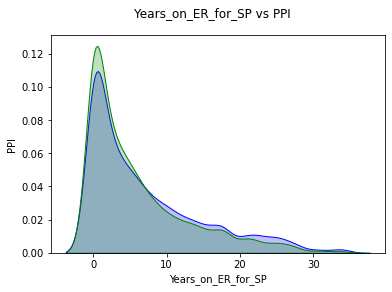

In [62]:
fig, ax = plt.subplots()
sns.kdeplot(df[df['PPI']==1]['Years_on_ER_for_SP'], shade=True, color="blue", label="Insured", ax=ax)
sns.kdeplot(df[df['PPI']==0]['Years_on_ER_for_SP'], shade=True, color="green", label="Not Insured", ax=ax)
ax.set_xlabel("Years_on_ER_for_SP")
ax.set_ylabel("PPI")
fig.suptitle("Years_on_ER_for_SP vs PPI");

Insurance bought increases with an increase in Years_on_ER_for_SP and improves post 8

In [63]:
# Checking unique values of Bankruptcy_Detected__SP_
df.Bankruptcy_Detected__SP_.value_counts()

N    16351
Y       24
T        8
Name: Bankruptcy_Detected__SP_, dtype: int64

In [64]:
# Bankruptcy_Detected__SP_ is a binary feature. Hence mapping T to Y
df['Bankruptcy_Detected__SP_'] = df['Bankruptcy_Detected__SP_'].replace("T","Y")

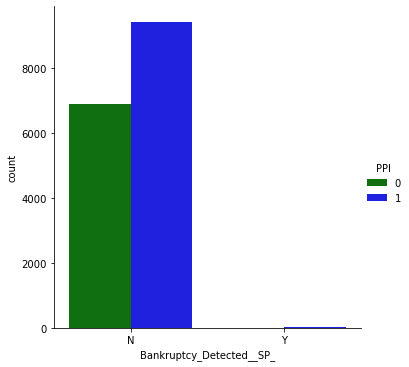

In [65]:
fig, ax = plt.subplots()
sns.catplot("Bankruptcy_Detected__SP_", hue="PPI", data=df, kind="count", palette={1:"blue",0:"green"}, ax=ax)
plt.close(1)
ax.set_xlabel("Bankruptcy_Detected__SP_")
fig.suptitle("Bankruptcy_Detected__SP_ vs PPI");

Insurance is bought significantly where no bankruptcy is found  
Also there are about 7000 customer's available for sell insurance

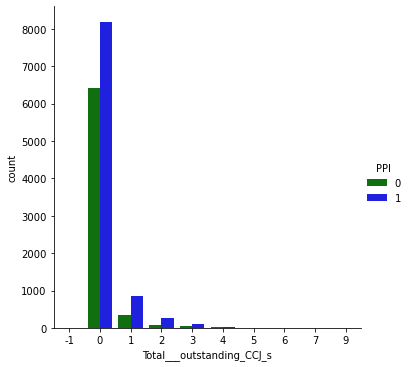

In [66]:
fig, ax = plt.subplots()
sns.catplot("Total___outstanding_CCJ_s", hue="PPI", data=df, kind="count", palette={1:"blue",0:"green"}, ax=ax)
plt.close(1)
ax.set_xlabel("Total___outstanding_CCJ_s")
fig.suptitle("Total___outstanding_CCJ_s vs PPI");

With lesser outstanding we have higher count of insurance customers, both to be acquired as well as already enrolled  
Again it's intutive to focus more on customer's with least outstanding

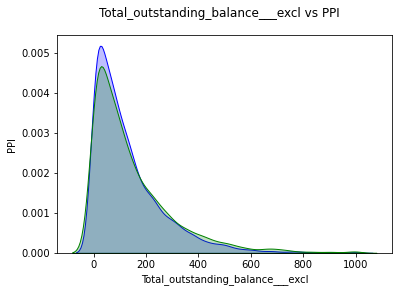

In [67]:
fig, ax = plt.subplots()
sns.kdeplot(df[df['PPI']==1]['Total_outstanding_balance___excl'], shade=True, color="blue", label="Insured", ax=ax)
sns.kdeplot(df[df['PPI']==0]['Total_outstanding_balance___excl'], shade=True, color="green", label="Not Insured", ax=ax)
ax.set_xlabel("Total_outstanding_balance___excl")
ax.set_ylabel("PPI")
fig.suptitle("Total_outstanding_balance___excl vs PPI");

As evident from the plot, people with lesser outstanding balance have purchased more insurance than people with higher outstanding balance. However the rise could definetly be improved using this property to filter the probable buyer

In [68]:
# Checking unique value of Total___of_accounts
df.Total___of_accounts.value_counts()

 9    4884
 5    1772
 4    1729
 6    1601
 3    1588
 7    1471
 8    1359
 2    1077
 1     630
 0     264
-1       8
Name: Total___of_accounts, dtype: int64

In [69]:
# Mapping -1 to 1, as a person cannot have a negative account
df['Total___of_accounts']  =df['Total___of_accounts'].replace(-1,1)

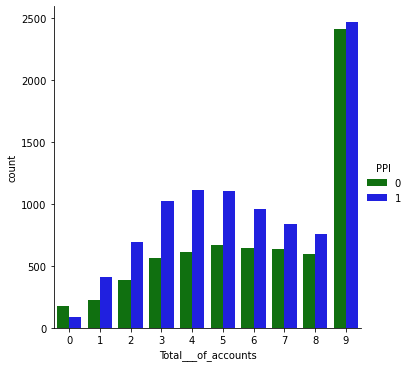

In [70]:
fig, ax = plt.subplots()
sns.catplot("Total___of_accounts", hue="PPI", data=df, kind="count", palette={1:"blue",0:"green"}, ax=ax)
plt.close(1)
ax.set_xlabel("Total___of_accounts")
fig.suptitle("Total___of_accounts vs PPI");

People with higher account have invested in insurance. Also there is a hugh acquistion potential by offering some account and insurance combo

In [71]:
# Checking the unique values
df.CIFAS_detected.value_counts()

N    16292
Y       83
T        8
Name: CIFAS_detected, dtype: int64

In [72]:
# CIFAS_detected should have binary outcomes. Hence mapping T to Y
df['CIFAS_detected'] = df['CIFAS_detected'].replace("T","Y")

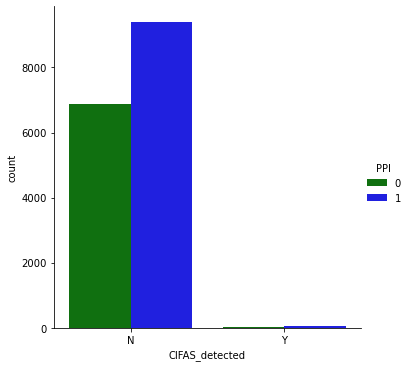

In [73]:
fig, ax = plt.subplots()
sns.catplot("CIFAS_detected", hue="PPI", data=df, kind="count", palette={1:"blue",0:"green"}, ax=ax)
plt.close(1)
ax.set_xlabel("CIFAS_detected")
fig.suptitle("CIFAS_detected vs PPI");

There is a hugh customer base of both acquired and to be acquired where no CIFAS has been detected.

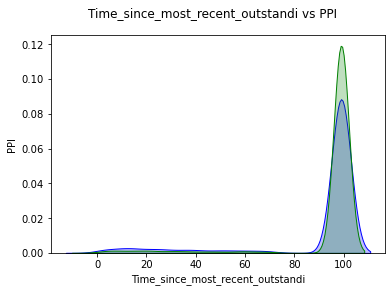

In [74]:
fig, ax = plt.subplots()
sns.kdeplot(df[df['PPI']==1]['Time_since_most_recent_outstandi'], shade=True, color="blue", label="Insured", ax=ax)
sns.kdeplot(df[df['PPI']==0]['Time_since_most_recent_outstandi'], shade=True, color="green", label="Not Insured", ax=ax)
ax.set_xlabel("Time_since_most_recent_outstandi")
ax.set_ylabel("PPI")
fig.suptitle("Time_since_most_recent_outstandi vs PPI");

Customer's should be acquired as soon as their outstanding is settled as evident from the plot

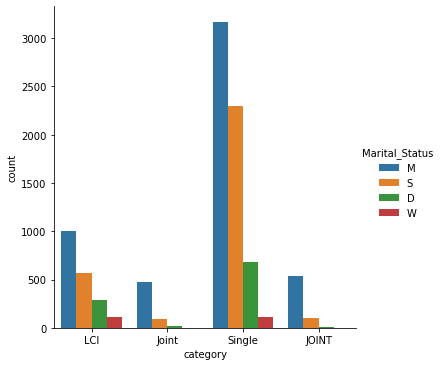

In [75]:
fig, ax = plt.subplots()
sns.catplot("category", hue="Marital_Status", data=df, kind="count", ax=ax)
plt.close(1)
ax.set_xlabel("category")
fig.suptitle("category vs Marital_Status");

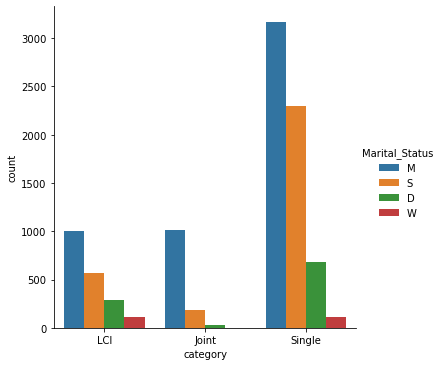

In [76]:
# Changing the case of category
df['category'] = df['category'].replace("JOINT","Joint")

#Plotting category and marital status
fig, ax = plt.subplots()
sns.catplot("category", hue="Marital_Status", data=df, kind="count", ax=ax)
plt.close(1)
ax.set_xlabel("category")
fig.suptitle("category vs Marital_Status");

Single insurance is the most preferred among customers irrespective of their marital status

In [77]:
cols = ['category','Insurance_Description','prdt_desc','code']
for col in cols:
    print("{} : {} null values out of {}, leaving {} non-nulls".format(col,df[col].isnull().sum(), len(df), len(df)-df[col].isnull().sum()))

category : 6922 null values out of 16383, leaving 9461 non-nulls
Insurance_Description : 6922 null values out of 16383, leaving 9461 non-nulls
prdt_desc : 7038 null values out of 16383, leaving 9345 non-nulls
code : 6978 null values out of 16383, leaving 9405 non-nulls


Category, Insurance Description, Product Description and Code is available majorly for those customers who have purchased insurance  
Hence we shouldn't keep them as a possible predictor

In [78]:
# Dropping the above mentioned features
df.drop(['category','Insurance_Description','prdt_desc','code'], axis=1, inplace=True)

# With this we have also removed columns with null values

# Dropping PPI, PPI_SINGLE, PPI_JOINT and PPI_LCI as we've already built an all inclusive label Total
df.drop(['PPI','PPI_SINGLE','PPI_JOINT','PPI_LCI'], axis=1, inplace=True)

In [79]:
num_col = [col for col in df.select_dtypes(exclude='object')]
cat_col = [col for col in df.select_dtypes(include='object')]

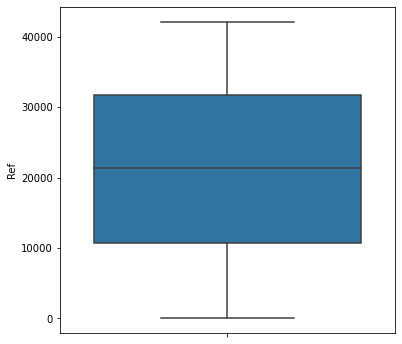

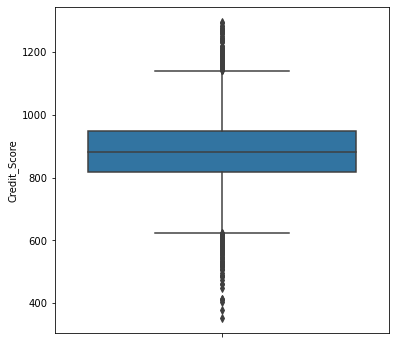

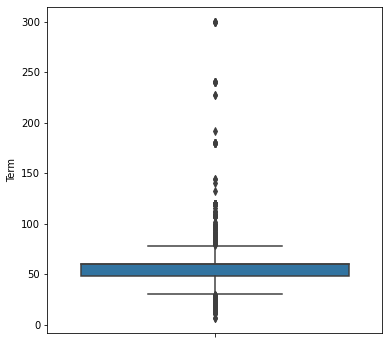

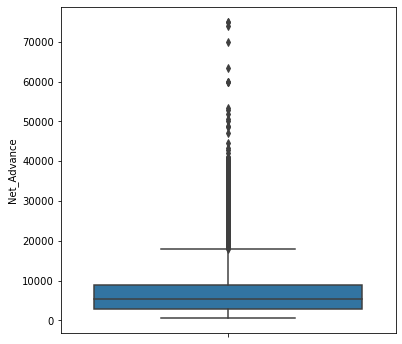

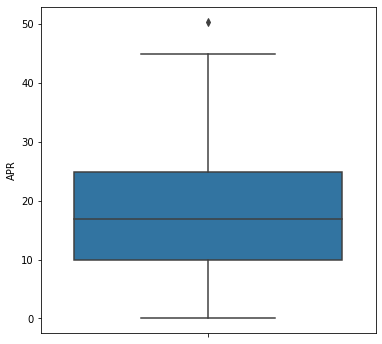

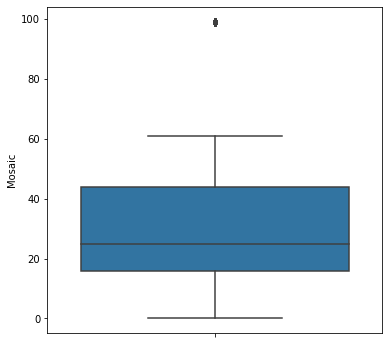

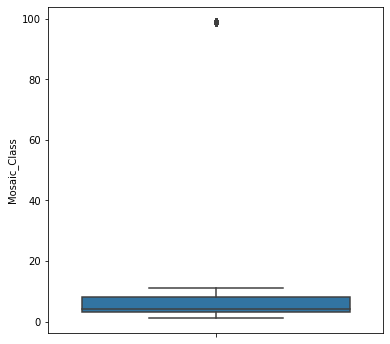

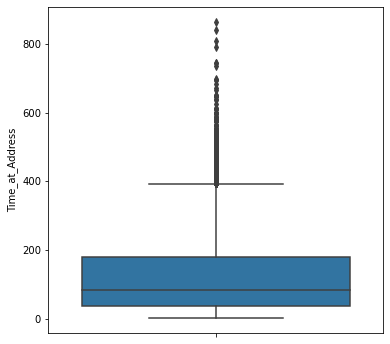

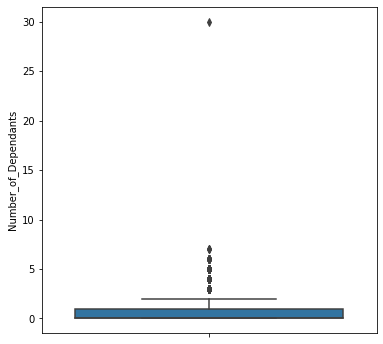

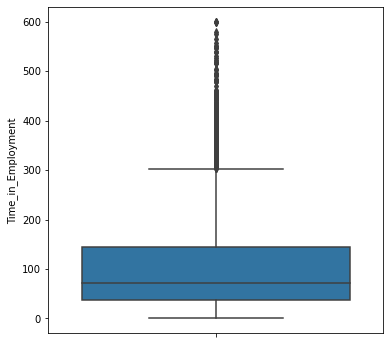

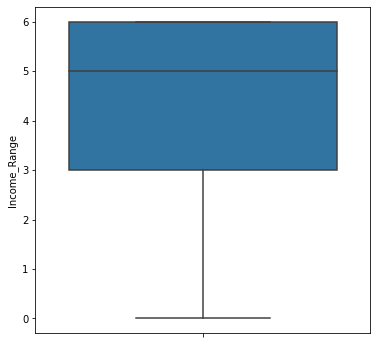

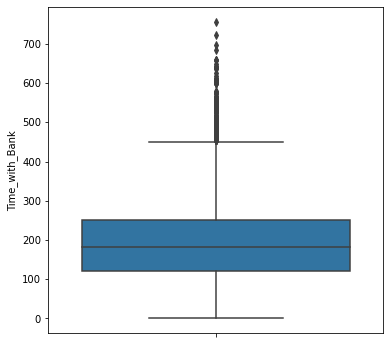

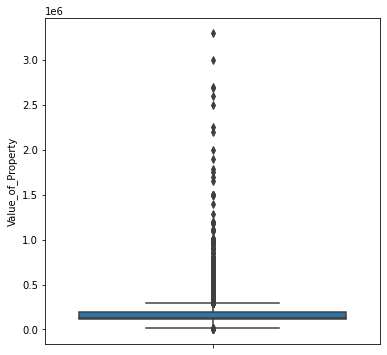

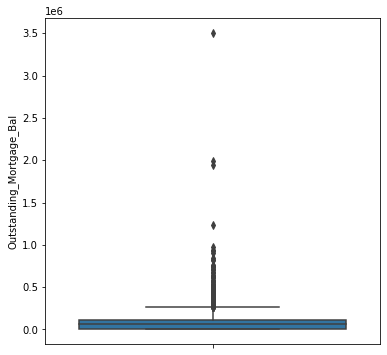

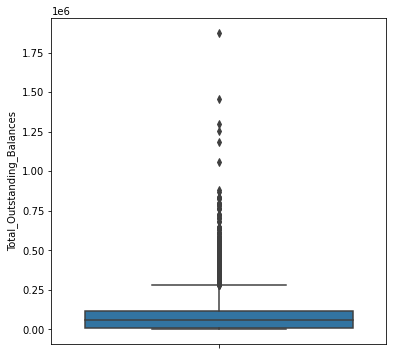

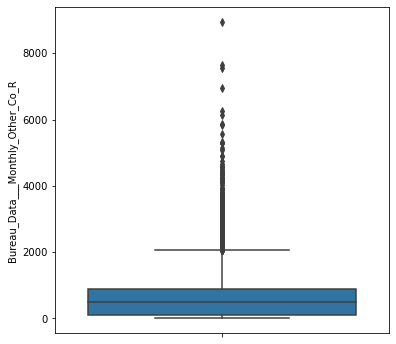

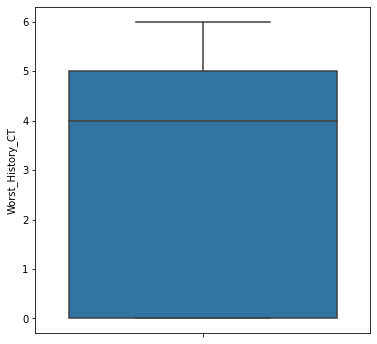

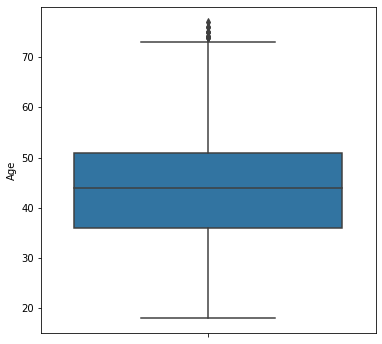

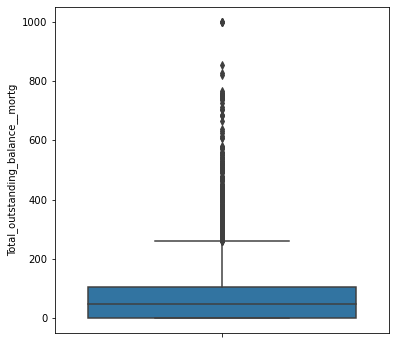

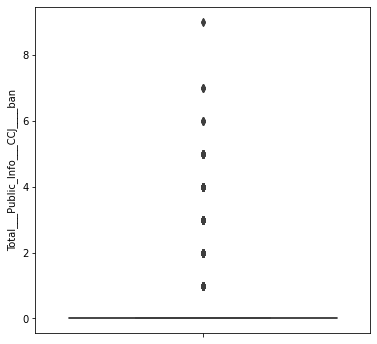

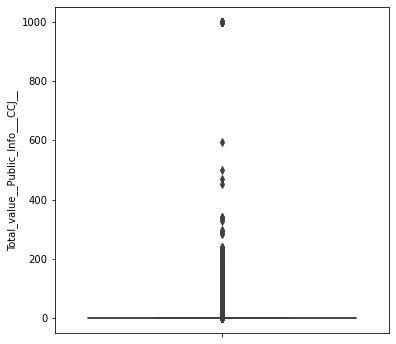

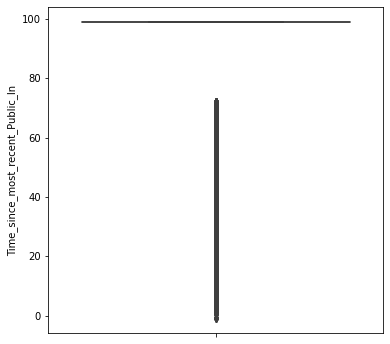

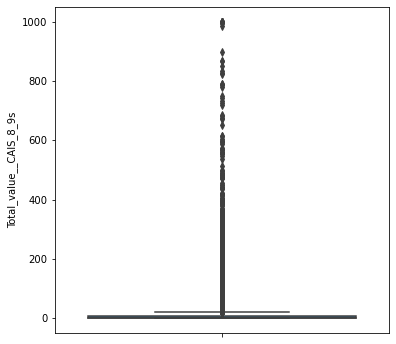

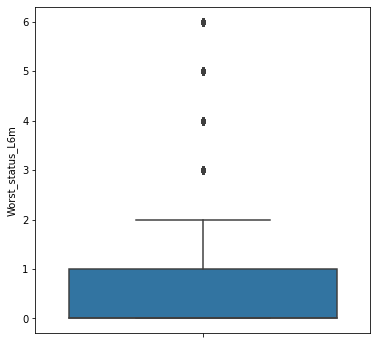

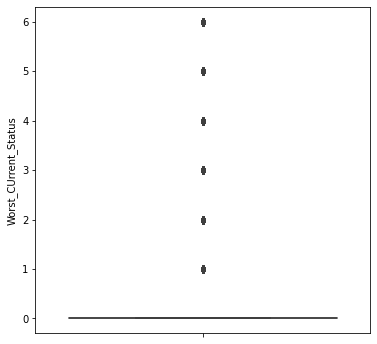

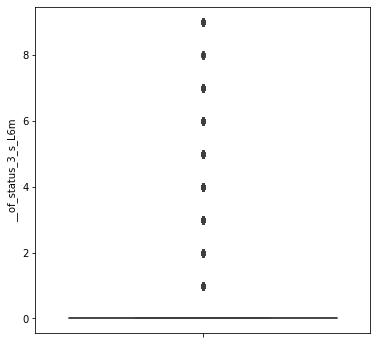

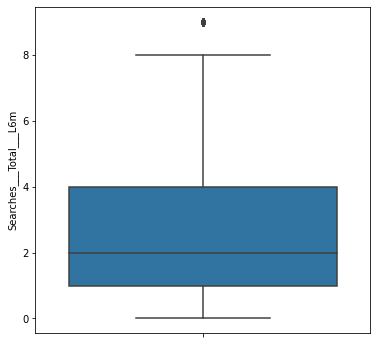

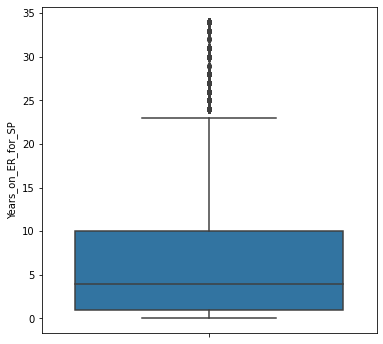

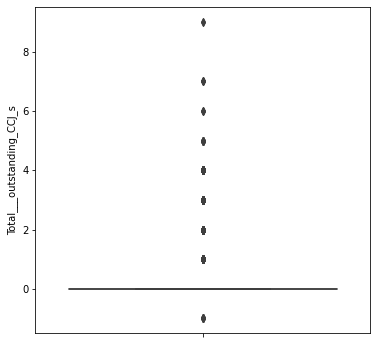

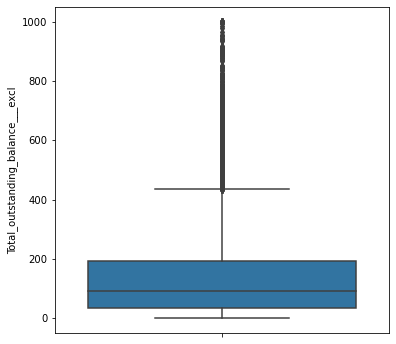

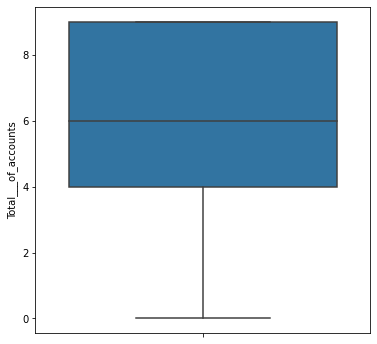

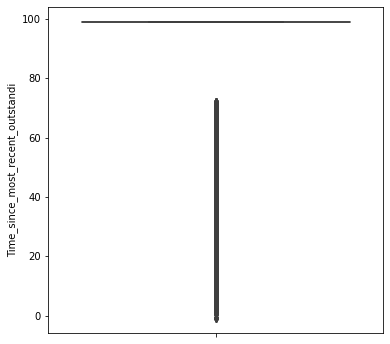

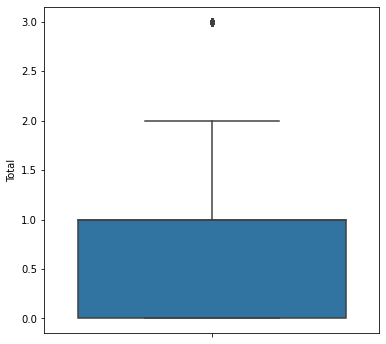

In [80]:
for feature in num_col:
    plt.figure(figsize=(6,6))
    sns.boxplot(y=feature, data = df)

There are outliers in many features  like Credit_Score, Term, Net_Advance, APR, Mosaic, Mosaic_Class, Time_at_Address, Number_of_Dependants, Time_in_Employment, Time_with_Bank, Value_of_Property, Outstanding_Mortage_Bal, Total_Outstanding_Balances, Bureau_Data_Monthly_Other_Co_R, Age etc  
No outliers in Income_Range, Worst_History_CT, Total_of_accounts  

In [81]:
# Splitting data into train and test set
train, test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)
y_train = train.pop('Total')
train_ref = train.pop('Ref')
x_train = train
y_test = test.pop('Total')
test_ref = test.pop('Ref')
x_test = test

In [82]:
# Mapping categorical columns with binary outputs to 0 & 1
def binary_map(dtafrm):
    for i in dtafrm.columns:
        if len(dtafrm[i].unique()) <3:
            for x,y in enumerate(dtafrm[i].unique()):
                dtafrm[i] = dtafrm[i].replace(y,x)
    return(dtafrm)

In [83]:
# Effect Encoding
encoder = ce.sum_coding.SumEncoder(cols = df.select_dtypes(include='object').columns, drop_invariant=True , verbose=False)

# Standard Scaler
scaler = StandardScaler()

In [84]:
#x_train = binary_map(x_train)
x_train = encoder.fit_transform(x_train)
x_train_col = x_train.columns
x_train = scaler.fit_transform(x_train)
#x_test = binary_map(x_test)
x_test = encoder.transform(x_test)
x_test_col = x_test.columns
x_test = scaler.transform(x_test)

In [85]:
x_train = pd.DataFrame(x_train, columns=x_train_col)
x_test = pd.DataFrame(x_test, columns = x_test_col)

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [87]:
models = []
models.append(('LR', LogisticRegression(multi_class='ovr', solver='liblinear')))
models.append(('LR', LogisticRegression(multi_class='multinomial', solver='newton-cg')))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RFC',RandomForestClassifier()))
models.append(('ABC', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('XGB',XGBClassifier()))

In [88]:
names = []
for name, model in models:
    cv_result = cross_val_score(model, x_train, y_train, cv=5, scoring='roc_auc_ovr')
    names.append(name)
    msg = "%s : %f (%f)" % (name, cv_result.mean(), cv_result.std())
    print(msg)

LR : 0.705929 (0.009824)
LR : 0.706494 (0.009295)
DT : 0.557837 (0.006037)
RFC : 0.706464 (0.006695)
ABC : 0.654880 (0.006429)
GBM : 0.726286 (0.007617)
XGB : 0.725062 (0.007816)


In [89]:
logreg = LogisticRegression(class_weight='balanced')

C_space = [0.1,0.5,0.9]
penalty = ['l1','l2']
multi_class = ['ovr','multinomial']
solver = ['liblinear','newton-cg']
max_iter = [150,200,250]

grid = dict(max_iter=max_iter,solver=solver, multi_class=multi_class, penalty=penalty, C=C_space)
cv = StratifiedKFold(n_splits=5, random_state=1)
grid_search = GridSearchCV(estimator=logreg, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc_ovr')
grid_result = grid_search.fit(x_train, y_train)
print("Best : %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best : 0.705465 using {'C': 0.1, 'max_iter': 150, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}


In [90]:
y_pred = grid_result.predict(x_test)

In [91]:
# Who should they target from the pool of customers that currently do not have a PPI
# What type of PPI product they should be targeting them with
predictions = pd.DataFrame(y_pred, index = test_ref, columns = ['Pred'])
predictions.head()

,Pred
Ref,
20712,0
3121,0
24479,1
29281,1
37074,0


In [92]:
predictions['y_test'] = y_test.values.reshape(-1,1)
predictions.head()

,Pred,y_test
Ref,,
20712,0,0
3121,0,2
24479,1,0
29281,1,0
37074,0,1


In [93]:
# Total predictions to be made
len(test)

4915

In [94]:
# True Labels
from collections import Counter
Counter(y_test)

Counter({0: 2094, 2: 362, 1: 1891, 3: 568})

In [95]:
# Count of predictions in each class
predictions['Pred'].value_counts()

0    2043
1    1745
2     735
3     392
Name: Pred, dtype: int64

In [96]:
neg = 0
pos1 = 0
pos2 = 0
pos3 = 0
for x,y in predictions.iterrows():
    if y['Pred'] == y['y_test'] == 0:
        neg += 1
    elif y['Pred'] == y['y_test'] == 1:
        pos1 += 1
    elif y['Pred'] == y['y_test'] == 2:
        pos2 += 1
    elif y['Pred'] == y['y_test'] == 3:
        pos3 += 1
print("Time and effort on non-conversions : {}".format(neg))
print("Quick PPI conversions : {}".format(pos1))
print("Quick PPI_Joint conversions : {}".format(pos2))
print("Quick PPI_LCI conversions : {}".format(pos3))

Time and effort on non-conversions : 1225
Quick PPI conversions : 973
Quick PPI_Joint conversions : 157
Quick PPI_LCI conversions : 160


We would save time, effort and money by not contacting customers from 0th label  
However due to lower accuracy we would still contact Actual 0's - Actual Predicted 0's = 2094 - 1225 = 869

PPI_Single :  
Possible Acquisitions = 1891  
Acquisitions through model = 973  
Loss = 869

PPI_Joint :  
Possible Acquisitions = 735  
Acquisitions through model = 157  
Loss = 578

PPI_LCI :  
Possible Acquisitions = 568  
Acquisitions through model = 160  
Loss = 408

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.59      0.59      2094
           1       0.56      0.51      0.54      1891
           2       0.21      0.43      0.29       362
           3       0.41      0.28      0.33       568

    accuracy                           0.51      4915
   macro avg       0.44      0.45      0.44      4915
weighted avg       0.53      0.51      0.52      4915



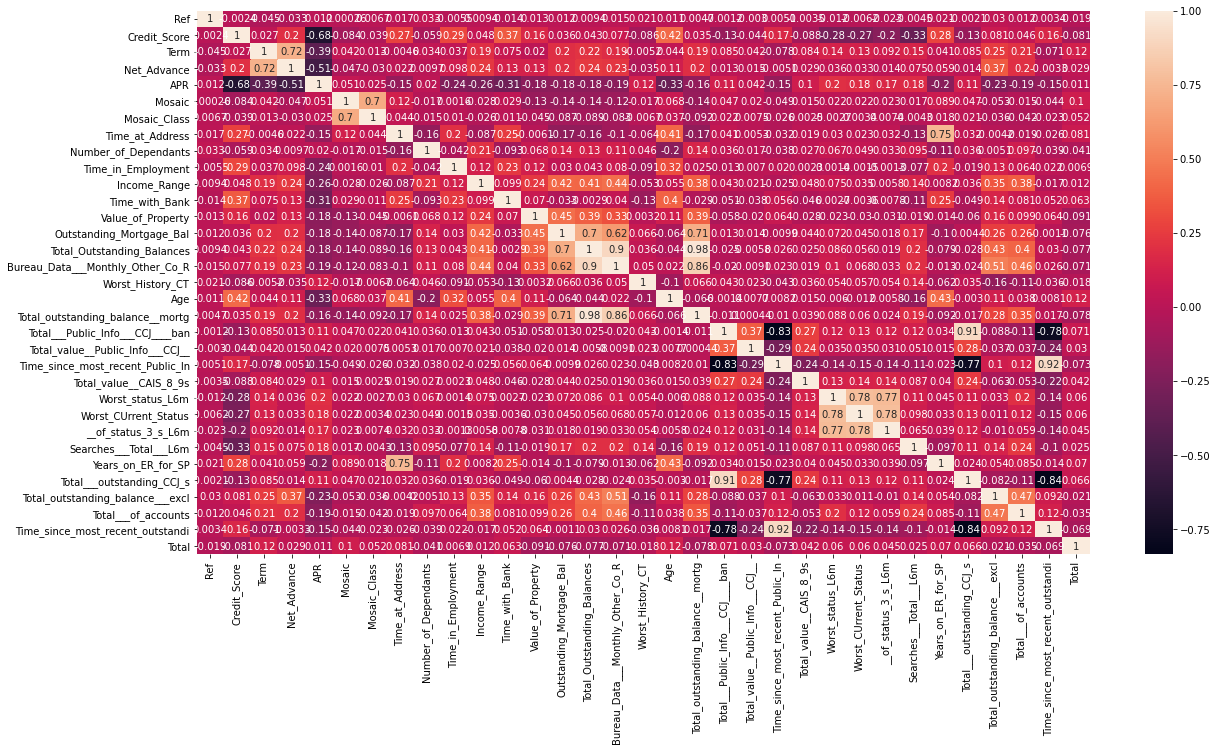

In [98]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [99]:
df1 = encoder.fit_transform(df)
correlation_matrix = df1.corr()

In [100]:
# Positive correlation above 5% with label 
correlation_matrix[correlation_matrix['Total']>0.05].sort_values(by=['Total'], ascending=False)

,intercept,Ref,Credit_Score,Final_Grade_0,Final_Grade_1,Final_Grade_2,Final_Grade_3,Final_Grade_4,Final_Grade_5,Final_Grade_6,...,__of_status_3_s_L6m,Searches___Total___L6m,Years_on_ER_for_SP,Bankruptcy_Detected__SP__0,Total___outstanding_CCJ_s,Total_outstanding_balance___excl,Total___of_accounts,CIFAS_detected_0,Time_since_most_recent_outstandi,Total
Total,NaN,-0.018900,-0.080623,0.012778,-0.057324,0.031071,0.023252,0.004483,0.012303,-0.025214,...,0.044680,0.024784,0.069558,-0.017464,0.066122,-0.020852,-0.035375,-0.005626,-0.068703,1.000000
Term,NaN,-0.045179,0.027229,0.069484,0.009967,0.024877,0.003589,-0.016549,0.021552,-0.034743,...,0.092491,0.145990,0.041073,-0.001006,0.084978,0.251200,0.205103,-0.007970,-0.071435,0.122728
Employment_Status_1,NaN,-0.004170,0.130982,0.009898,0.117290,-0.024105,-0.032070,-0.033362,-0.021866,-0.007018,...,-0.017481,-0.069942,0.152358,0.001652,-0.031171,-0.045904,-0.054923,0.002126,0.031002,0.121731
Age,NaN,0.010938,0.421360,0.096541,0.351477,-0.030641,-0.094704,-0.108153,-0.067909,-0.065739,...,0.005782,-0.155368,0.428639,-0.006946,-0.002954,0.105421,0.037790,0.004751,0.008056,0.120603
Employment_Status_4,NaN,-0.010273,-0.021055,0.012360,-0.022363,0.012613,0.011297,0.011416,-0.005398,0.005394,...,-0.003748,-0.031004,0.039174,0.006235,-0.012830,-0.050386,-0.044232,0.010533,0.015361,0.115592
Mosaic,NaN,0.000258,-0.083799,0.016211,-0.016207,0.017179,0.025067,-0.000425,0.012012,0.017402,...,0.023027,0.017092,0.089441,0.008305,0.046854,-0.053481,-0.014935,0.021428,-0.043505,0.103487
Time_at_Address,NaN,0.016713,0.270914,0.039981,0.251823,-0.048484,-0.068381,-0.064345,-0.054583,-0.035091,...,0.032153,-0.131512,0.750093,0.002933,0.032481,-0.004231,-0.018619,0.021560,-0.026230,0.080645
Total___Public_Info___CCJ____ban,NaN,-0.001208,-0.134685,-0.003138,-0.122415,-0.003104,0.045783,0.024618,0.030557,0.009144,...,0.119117,0.119076,0.033719,-0.139224,0.906929,-0.088399,-0.108481,-0.018532,-0.776114,0.071196
Years_on_ER_for_SP,NaN,0.021002,0.281766,0.046760,0.277094,-0.051504,-0.075064,-0.071220,-0.053910,-0.041705,...,0.039458,-0.096570,1.000000,0.005635,0.024271,0.053876,0.085320,0.026818,-0.014026,0.069558
Residential_Status_2,NaN,0.004282,-0.126929,-0.027713,-0.113942,0.042837,0.034828,0.027440,0.025143,0.021830,...,-0.007649,-0.041567,-0.096894,0.003574,-0.002114,-0.085269,-0.133908,0.007002,-0.014068,0.069438


In [101]:
# Inverse correlation to label
correlation_matrix[correlation_matrix['Total']<-0.05].sort_values(by=['Total'], ascending=True)

,intercept,Ref,Credit_Score,Final_Grade_0,Final_Grade_1,Final_Grade_2,Final_Grade_3,Final_Grade_4,Final_Grade_5,Final_Grade_6,...,__of_status_3_s_L6m,Searches___Total___L6m,Years_on_ER_for_SP,Bankruptcy_Detected__SP__0,Total___outstanding_CCJ_s,Total_outstanding_balance___excl,Total___of_accounts,CIFAS_detected_0,Time_since_most_recent_outstandi,Total
Value_of_Property,NaN,0.012818,0.163672,0.025989,0.163033,-0.034735,-0.055052,-0.042112,-0.033114,-0.020956,...,-0.031412,-0.019400,-0.014482,0.012308,-0.059693,0.160892,0.099192,-0.024743,0.064186,-0.091027
Credit_Score,NaN,-0.002424,1.000000,0.248071,0.693522,-0.029355,-0.157789,-0.185800,-0.093014,-0.145592,...,-0.200008,-0.333832,0.281766,0.005476,-0.133541,0.081318,0.046298,0.005155,0.158588,-0.080623
Total_outstanding_balance__mortg,NaN,0.004748,0.034731,0.072132,0.016399,0.010454,-0.017249,-0.019532,0.003880,-0.012840,...,0.024493,0.187888,-0.092494,0.015533,-0.016586,0.279257,0.351962,-0.035413,0.016507,-0.078303
Total_Outstanding_Balances,NaN,0.009415,0.043333,0.075952,0.024288,0.009020,-0.019045,-0.021308,0.002530,-0.015395,...,0.019436,0.197807,-0.079229,0.018410,-0.028360,0.425509,0.401028,-0.035013,0.029708,-0.076525
Outstanding_Mortgage_Bal,NaN,0.011759,0.036056,0.067337,0.030118,0.008831,-0.018943,-0.019644,0.005697,-0.025338,...,0.017781,0.168807,-0.103829,0.006173,0.004446,0.260217,0.263260,-0.028424,-0.001108,-0.076038
Time_since_most_recent_Public_In,NaN,0.005075,0.167619,0.018544,0.146967,-0.001408,-0.051486,-0.036460,-0.039935,-0.015398,...,-0.141565,-0.111873,-0.023321,0.118741,-0.767648,0.099956,0.118527,0.032671,0.918681,-0.073267
Bureau_Data___Monthly_Other_Co_R,NaN,0.015239,0.076908,0.070682,0.062665,-0.000242,-0.018871,-0.032285,-0.003158,-0.017024,...,0.033235,0.200773,-0.012977,0.022836,-0.023833,0.507974,0.461210,-0.023084,0.025542,-0.070738
Time_since_most_recent_outstandi,NaN,0.003437,0.158588,0.023035,0.136217,-0.007256,-0.053349,-0.037510,-0.035743,-0.019187,...,-0.143936,-0.101499,-0.014026,0.089757,-0.835016,0.091885,0.121910,0.025074,1.000000,-0.068703
Final_Grade_1,NaN,-0.002654,0.693522,-0.277874,1.000000,-0.145977,-0.079898,-0.053727,-0.094485,0.065704,...,-0.135951,-0.252034,0.277094,0.023926,-0.113011,0.070024,0.082423,0.005399,0.136217,-0.057324


In [102]:
import pickle
saved_model = pickle.dumps(grid_result)